# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | russkaya polyana
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | papao
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | atafu village
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | ahau
City not found. Skipping...
Processing Record 10 of Set 1 | kyren
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | al jadid
Processing Record 13 of Set 1 | vilyuchinsk
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | okhotsk
Processing Record 17 of Set 1 | haiku-pauwela
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | klyuchi
Processing Record 20 of Set 1 | belozersk
Processing Record 21 of Set 1 | taoudenni
Processing Record 22 of Set 1 | kan

In [47]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [48]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,russkaya polyana,49.4170,31.9201,273.82,85,17,2.09,UA,1731388103
1,anadyr,64.7500,177.4833,260.43,78,75,4.00,RU,1731388104
2,papao,-17.7500,-149.5500,299.97,82,89,8.70,PF,1731388106
3,tiksi,71.6872,128.8694,254.06,96,100,0.59,RU,1731388108
4,atafu village,-8.5421,-172.5159,301.89,72,21,5.94,TK,1731388110


In [49]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [50]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,russkaya polyana,49.4170,31.9201,273.82,85,17,2.09,UA,1731388103
1,anadyr,64.7500,177.4833,260.43,78,75,4.00,RU,1731388104
2,papao,-17.7500,-149.5500,299.97,82,89,8.70,PF,1731388106
3,tiksi,71.6872,128.8694,254.06,96,100,0.59,RU,1731388108
4,atafu village,-8.5421,-172.5159,301.89,72,21,5.94,TK,1731388110


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

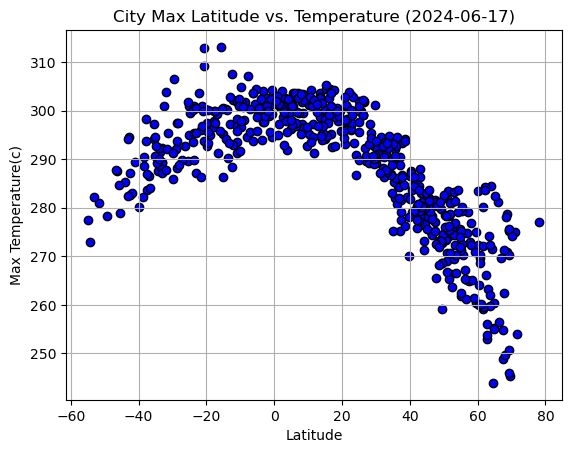

In [51]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],c="blue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(c)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.grid()
plt.show()

#### Latitude Vs. Humidity

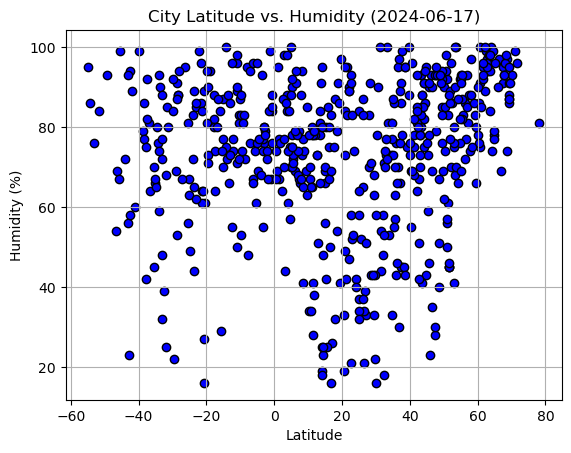

In [52]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],c="blue", edgecolor="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.grid()
plt.show()

#### Latitude Vs. Cloudiness

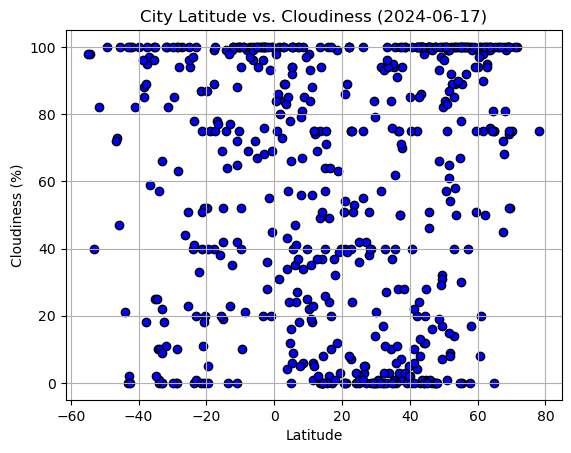

In [53]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],c="blue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

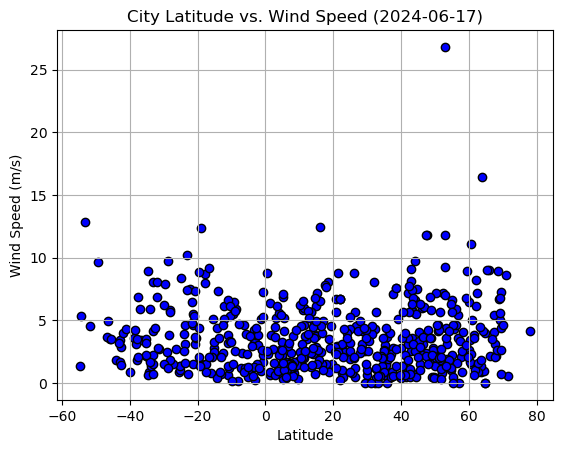

In [54]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],c="blue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.grid()
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots
def linear_refression(x_value,y_value,x_label,y_label,title,e_loc=(0.05, 0.95)):
    slope, intercept, r_value, p_value, std_err = linregress(x_value, y_value)
    regression_line = slope * x_value + intercept
    plt.scatter(x_value, y_value, color='blue', edgecolor='black')
    print(f"The r^2-value is: {r_value**2}")
    plt.plot(x_value, regression_line, color='red')
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.text(e_loc[0], e_loc[1], equation, color='red', transform=plt.gca().transAxes,fontsize=16)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
   
    


In [56]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,russkaya polyana,49.4170,31.9201,273.82,85,17,2.09,UA,1731388103
1,anadyr,64.7500,177.4833,260.43,78,75,4.00,RU,1731388104
3,tiksi,71.6872,128.8694,254.06,96,100,0.59,RU,1731388108
8,kyren,51.6828,102.1408,278.27,45,61,1.67,RU,1731388119
9,bethel,41.3712,-73.4140,285.13,75,10,0.45,US,1731388121


In [57]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,papao,-17.7500,-149.5500,299.97,82,89,8.70,PF,1731388106
4,atafu village,-8.5421,-172.5159,301.89,72,21,5.94,TK,1731388110
5,waitangi,-43.9535,-176.5597,285.27,72,21,1.79,NZ,1731388112
6,adamstown,-25.0660,-130.1015,294.94,67,100,1.34,PN,1731388115
7,puerto natales,-51.7236,-72.4875,280.95,84,82,4.57,CL,1731388116


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7819570635655234


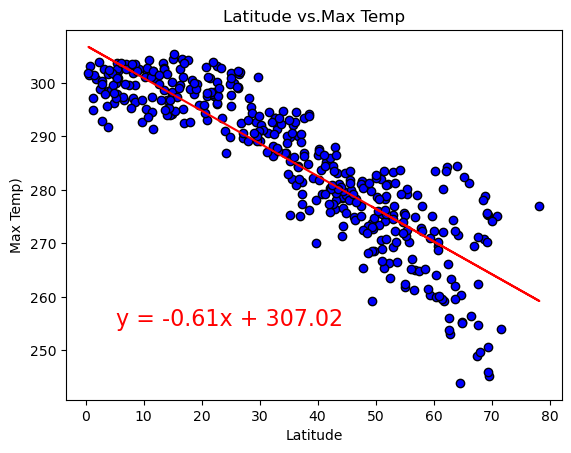

In [58]:
# Linear regression on Northern Hemisphere
linear_refression(
    x_value=northern_hemi_df["Lat"],
    y_value=northern_hemi_df["Max Temp"],
    x_label="Latitude",
    y_label="Max Temp)",
    title="Latitude vs.Max Temp",
    e_loc=(0.1, 0.2)
)

The r^2-value is: 0.4762948706926201


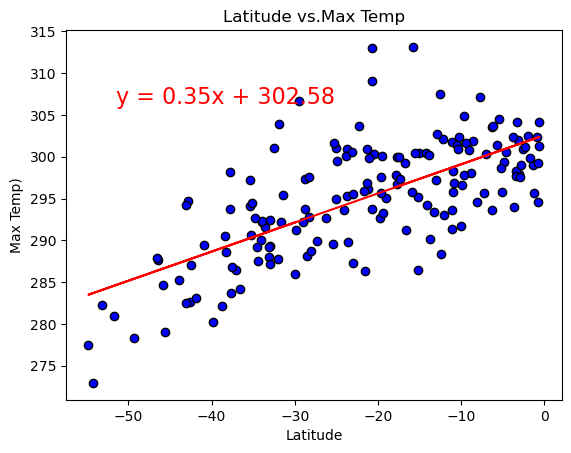

In [59]:
# Linear regression on Southern Hemisphere
linear_refression(
    x_value=southern_hemi_df["Lat"],
    y_value=southern_hemi_df["Max Temp"],
    x_label="Latitude",
    y_label="Max Temp)",
    title="Latitude vs.Max Temp",
    e_loc=(0.1, 0.8)
)

**Discussion about the linear relationship:**

1.Northern Hemisphere:

- The relation between latitude and Max temperature in this graph usually is negative. As the latitude increase, the maximum temperature is decrease.

2.Southern Hemisphere:

- The relation between latitude and Max temperature in this graph usually is positive.As the latitude increase the maximum temperature is increase.

**Overall the relationship between  latitude and Max temperature indicates that the Northern Hemisphere is opposite of the Southern Hemisphere.**

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0970804142311041


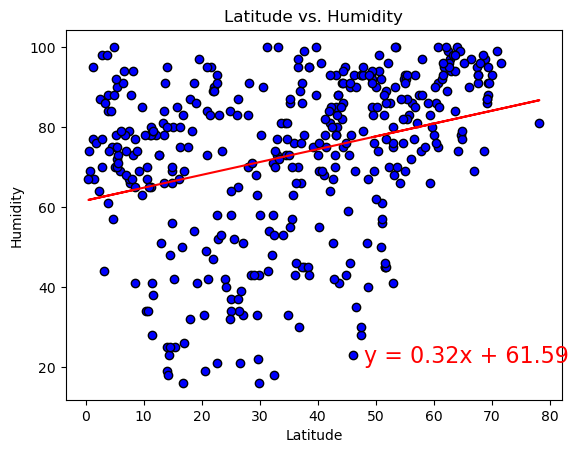

In [60]:
# Northern Hemisphere
linear_refression(
    x_value=northern_hemi_df["Lat"],
    y_value=northern_hemi_df["Humidity"],
    x_label="Latitude",
    y_label="Humidity",
    title="Latitude vs. Humidity",
    e_loc=(0.6, 0.1)
)

The r^2-value is: 0.00989127001043113


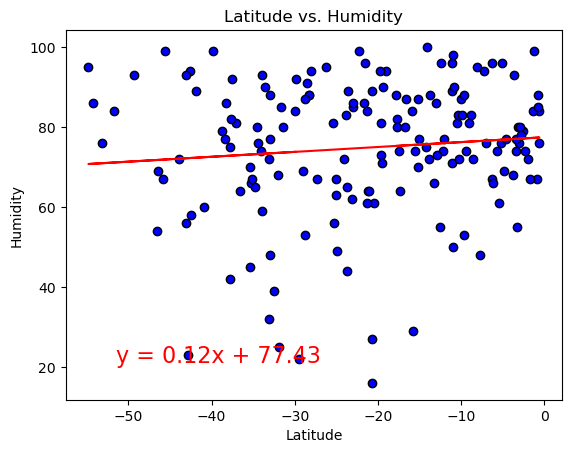

In [61]:
# Southern Hemisphere
linear_refression(
    x_value=southern_hemi_df["Lat"],
    y_value=southern_hemi_df["Humidity"],
    x_label="Latitude",
    y_label="Humidity",
    title="Latitude vs. Humidity",
    e_loc=(0.1, 0.1)
)

**Discussion about the linear relationship:** 

1 Northern Hemisphere:
- Here the slop is positive, means the relationship between latitude and humidity is as we move from the north equator the humidy usually increase.

2 Southern Hemisphere:
- In the southern Hemisphere is similer to the northern hemisphere the slop is positive, as we move from the south equator the humidy level rise.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0676689470291057


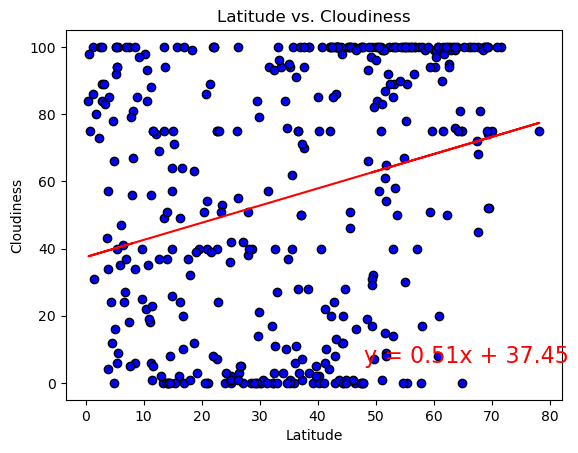

In [62]:
# Northern Hemisphere
linear_refression(
    x_value=northern_hemi_df["Lat"],
    y_value=northern_hemi_df["Cloudiness"],
    x_label="Latitude",
    y_label="Cloudiness",
    title="Latitude vs. Cloudiness",
    e_loc=(0.6, 0.1)
)

The r^2-value is: 0.02280258026452579


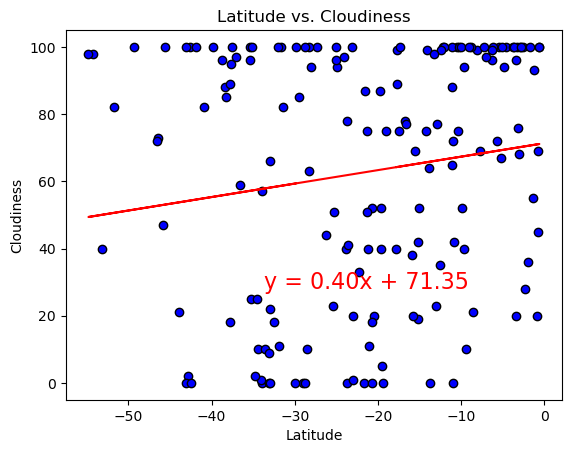

In [63]:
# Southern Hemisphere
linear_refression(
    x_value=southern_hemi_df["Lat"],
    y_value=southern_hemi_df["Cloudiness"],
    x_label="Latitude",
    y_label="Cloudiness",
    title="Latitude vs. Cloudiness",
    e_loc=(0.4, 0.3)
)

**Discussion about the linear relationship:** 

1 Northern Hemisphere

- In the Northern Hemisphere, the slop may indicate either a weak or non-significant correlation between latitude and cloudiness. This suggests that cloudiness levels do not have a strong or consistent trend as we move north from the equator

2 Southern Hemisphere

- Similar to the Northern Hemisphere, this suggests no clear or consistent trend between latitude and cloudiness as we move south from the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.013189542665646021


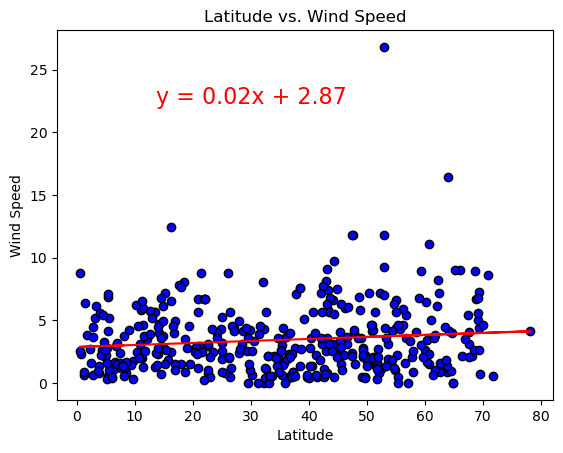

In [64]:
# Northern Hemisphere
linear_refression(
    x_value=northern_hemi_df["Lat"],
    y_value=northern_hemi_df["Wind Speed"],
    x_label="Latitude",
    y_label="Wind Speed",
    title="Latitude vs. Wind Speed",
    e_loc=(0.2, 0.8)
)

The r^2-value is: 0.022547395753038033


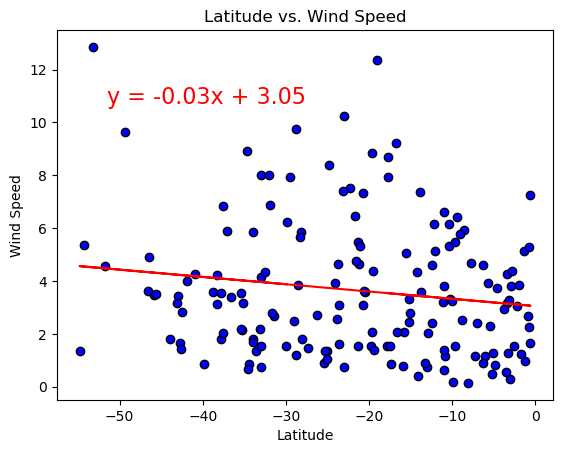

In [65]:
# Southern Hemisphere
linear_refression(
    x_value=southern_hemi_df["Lat"],
    y_value=southern_hemi_df["Wind Speed"],
    x_label="Latitude",
    y_label="Wind Speed",
    title="Latitude vs. Wind Speed",
    e_loc=(0.1, 0.8)
)

**Discussion about the linear relationship:** 

1 Northern Hemisphere

- Here the slope is positive, it implies that wind speed increases as latitude increases, moving away from the equator.

2 Southern Hemisphere

- A negative slope would suggest a decrease in wind speed with increasing latitude.

